## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [46]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

In [47]:
np.random.seed(0)


#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [48]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

In [49]:
print(X_train.shape)

(100, 784)


1). Code the helper function 'show_data()' that visualizes each given observation. HINT: use matplotlib.pyplot.imshow() and scipy.ndimage.interpolation().

In [50]:
from scipy.ndimage.interpolation import rotate

def show_data(X, Y, n, angle=0):
        X= X_train.reshape(-1, 28, 28)
        img = list(zip(X, Y_train))
        image  =  img[n][0]
        plt.subplot(100, 784, n)
        plt.figure(figsize=(10,3))
        image = rotate(image, angle, axes=(1, 0))
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

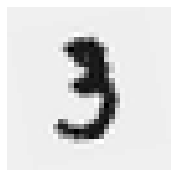

In [51]:
# Example 1.
show_data(X_train, Y_train,10,+10)

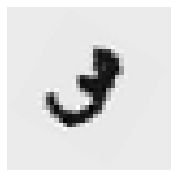

In [52]:
# Example 2.
show_data(X_train, Y_train,10,-30)

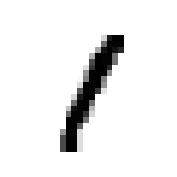

In [53]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

#Hyperparameters tuning (optimization)
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, Y_train)
#Accuracy
print("Accuarcy : ",gs_knn.score(X_train, Y_train))
print(gs_knn.best_params_)

Accuarcy :  0.88
{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}


3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [55]:
def rotate_data(image, angle=0):
    return rotate(image, angle, axes=(1, 0))

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [56]:
import random
X = X_train.reshape(-1, 28, 28)
img = list(zip(X, Y_train))
x_augmanted = X_train
for row, image in enumerate(img[:100]):
    angle = random.randint(-360, 360)
    image  =  img[row][0]
    image  = rotate_data(image, angle)
    image = np.array(image)
    np.append(x_augmanted,image)
    


5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [57]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

#Hyperparameters tuning (optimization)
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(x_augmanted, Y_train)
#Accuracy
print("Accuarcy : ",gs_knn.score(x_augmanted, Y_train))
print(gs_knn.best_params_)

Accuarcy :  0.88
{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}
